In [1]:
import pandas as pd
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_excel('demands.xlsx',index_col = 0)
summary = pd.read_excel('summary.xlsx', index_col = 0)

In [40]:
C17 = data["C17"]
reversed_C17 = C17.iloc[::-1]
reversed_C17.index = np.arange(-len(reversed_C17), 0)
# # reversed_C17.index = pd.to_datetime(reversed_C17.index, origin=pd.Timestamp('2021-01-01'), unit='D') 


In [24]:
np.random.seed(seed=100)
Last_week = reversed_C17[-1]
diff = reversed_C17.pct_change()
num_simulation = 100
num_days = 50
simulation_df = pd.DataFrame()

for x in range(num_simulation):
    count = 0
    daily_vol = diff.std()
    mean_vol = diff.mean()
    
    demand_series = []
    
    demand = Last_week * (1 + np.random.normal(mean_vol, daily_vol))
    demand_series.append(demand)
    
    for y in range(num_days):
        if count == num_days - 1:
            break
        demand = demand_series[count] * (1 + np.random.normal(mean_vol, daily_vol))
        demand_series.append(demand)
        count += 1
    simulation_df[x] = demand_series
ind = []
for index in range(simulation_df.shape[1]):
    columnSeriesObj = simulation_df.iloc[:, index]
#     print(simulation_df.iloc[:, index].mean())
    if simulation_df.iloc[:, index].mean() > Last_week * 3:
        ind.append(index)
ind

[5,
 6,
 10,
 24,
 27,
 28,
 31,
 33,
 36,
 43,
 45,
 46,
 50,
 51,
 52,
 55,
 58,
 62,
 64,
 69,
 71,
 75,
 77,
 80,
 84,
 85,
 93,
 99]

In [25]:
simulation_df = simulation_df.drop(simulation_df.columns[ind], axis=1)

In [30]:
simulation_df['mean'] = simulation_df.mean(axis = 1)
mean_val = simulation_df.rolling(2).mean()
std_val = simulation_df.rolling(2).std()
min_val = mean_val - 1.96*std_val
max_val = mean_val + 1.96*std_val
simulation_df['lower limit'] = min_val.mean(axis=1)
simulation_df['upper limit'] = max_val.mean(axis=1)

In [39]:
#

<Figure size 432x288 with 0 Axes>

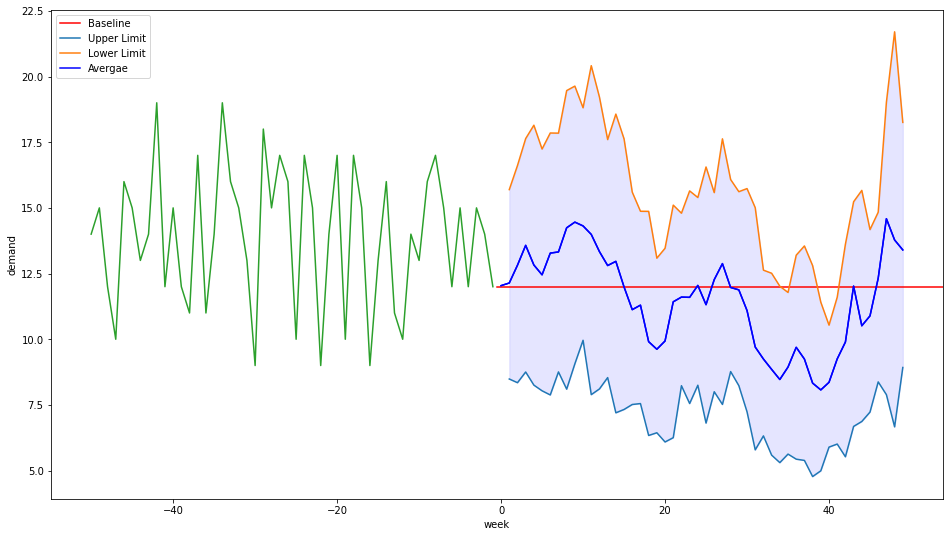

In [38]:
fig = plt.figure()
plt.figure(figsize=(16,9))
fig.suptitle('Monte Carlo Simulation for C17')
plt.axhline(y = Last_week,xmin = 0.5, color = 'r',
            linestyle = '-')
plt.plot(simulation_df['lower limit'])
plt.plot(simulation_df['upper limit'])
plt.plot(simulation_df['mean'], color = 'b')
plt.legend(['Baseline','Upper Limit','Lower Limit','Avergae'])
plt.fill_between(range(0,50),simulation_df['lower limit'],simulation_df['upper limit'],
                color='b', alpha=0.1)
plt.plot(reversed_C17)
plt.plot(simulation_df['mean'], color = 'b')
plt.xlabel('week')
plt.ylabel('demand')
plt.show()